# image classification

In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [21]:
 # load the images data

In [22]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [23]:
x_test.shape

(10000, 32, 32, 3)

In [24]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [25]:
# y_test = y_test.reshape(-1,)

In [26]:
classes = ["plane", "auto", "brid", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [27]:
def plot_sample(x,y,v):
    plt.figure(figsize = (15,2))
    plt.imshow(x[v])
    plt.xlabel(classes[y[v]])

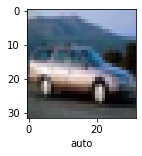

In [28]:
plot_sample(x_train, y_train, 4)

In [29]:
x_train = x_train / 255
x_test = x_test / 255

In [30]:
! pip install tensorflow

#convolutions

In [31]:
cnn = models.Sequential([
    #define charactor of images
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])


In [32]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [33]:
cnn.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5413 - accuracy: 0.4453
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1901 - accuracy: 0.5797
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0584 - accuracy: 0.6284
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9871 - accuracy: 0.6547
Epoch 5/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9354 - accuracy: 0.6745


In [34]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9739 - accuracy: 0.6593


[0.9738945364952087, 0.6593000292778015]

In [35]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[6.0269292e-03, 2.3237999e-04, 4.5605205e-02, 6.9081926e-01,
        3.0391479e-03, 9.5640600e-02, 9.9515542e-02, 1.3512767e-04,
        5.8532726e-02, 4.5309955e-04],
       [6.9507070e-02, 6.8698043e-01, 1.9145641e-04, 7.3574806e-06,
        7.4109616e-05, 3.0796514e-06, 1.4049986e-07, 1.7954688e-05,
        1.9832225e-01, 4.4896115e-02],
       [8.2232237e-02, 3.6265716e-01, 4.7269217e-03, 4.4178851e-03,
        2.0281863e-03, 8.5520302e-04, 7.6772791e-04, 1.1046018e-03,
        2.8887692e-01, 2.5233322e-01],
       [6.1191452e-01, 3.2078177e-02, 7.9096816e-02, 1.0828888e-03,
        1.6499888e-02, 7.9541227e-05, 6.9203961e-04, 5.9826503e-04,
        2.5521305e-01, 2.7447599e-03],
       [5.4923294e-05, 7.3421303e-05, 3.4590617e-02, 5.2012660e-02,
        6.0315114e-01, 1.5562393e-02, 2.9404098e-01, 4.6482813e-04,
        4.0660281e-05, 8.3627147e-06]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 4]

In [37]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

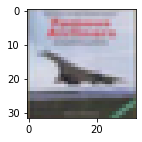

In [47]:
plot_sample(x_test, y_test,3)

In [46]:
classes[y_classes[3]]

'plane'

TypeError: only integer scalar arrays can be converted to a scalar index

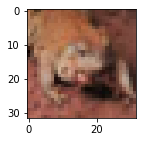

In [51]:
plot_sample(x_test, y_test,5)

In [50]:
classes[y_classes[5]]

'frog'